# Proposition d'approche de clustering sur le dataset "Clients_achats"

## I- Prise en compte de données :

In [30]:
# Import des outils usuels:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
# Désactiver les warnings
import warnings
warnings.filterwarnings("ignore")
# Orienter vers le bon dossier
import os
repertoire = './'
os.chdir(repertoire)

In [53]:
# Import du dataset
D_brut = pd.read_excel("clients_achats.xlsx",sheet_name="var_actives")
print(f'Dimension du dataset chargé : {D_brut.shape}')
D_brut.head()

Dimension du dataset chargé : (20000, 10)


Numero Marital Status  Gender  Yearly Income  Children        Education  \
0       1         Single    Male          30000         0  Partial College   
1       2        Married  Female          40000         0  Graduate Degree   
2       3        Married    Male         160000         5  Partial College   
3       4         Single    Male         160000         0  Graduate Degree   
4       5         Single  Female          70000         2        Bachelors   

       Occupation Home Owner  Cars  Age  
0        Clerical         No     1   33  
1        Clerical        Yes     0   37  
2    Professional         No     3   55  
3      Management        Yes     2   47  
4  Skilled Manual         No     1   38

In [33]:
# Supprimer une variable non informative: Le Numéro dans le fichier initial
D = D_brut.iloc[:, 1:]
D.head()

Marital Status  Gender  Yearly Income  Children        Education  \
0         Single    Male          30000         0  Partial College   
1        Married  Female          40000         0  Graduate Degree   
2        Married    Male         160000         5  Partial College   
3         Single    Male         160000         0  Graduate Degree   
4         Single  Female          70000         2        Bachelors   

       Occupation Home Owner  Cars  Age  
0        Clerical         No     1   33  
1        Clerical        Yes     0   37  
2    Professional         No     3   55  
3      Management        Yes     2   47  
4  Skilled Manual         No     1   38

In [35]:
# Vérification données manquantes na et duplicata
print(f'Nombre de valeurs manquantes de type na: {D.isna().sum().sum()}')
print(f'Nombre d\'observations dupliquées : {D.duplicated().sum()}')

Nombre de valeurs manquantes de type na: 0
Nombre d'observations dupliquées : 15661


Le dataset présente 15661 observations dupliquées. Il s'agit apriori d'un équilibrage volontaire pour ce dataset pédagogique. Disposant de suffisamment de ressources de calcul nous les gardons.

In [36]:
# Types de données et cohérence avec les mesures
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Marital Status  20000 non-null  object
 1   Gender          20000 non-null  object
 2   Yearly Income   20000 non-null  int64 
 3   Children        20000 non-null  int64 
 4   Education       20000 non-null  object
 5   Occupation      20000 non-null  object
 6   Home Owner      20000 non-null  object
 7   Cars            20000 non-null  int64 
 8   Age             20000 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.4+ MB


Les types de données sont bien cohérents avec les mesures.

In [37]:
# Aperçu statistique des données quantitatives
D.describe(exclude='object')

Yearly Income      Children         Cars          Age
count   20000.000000  20000.000000  20000.00000  20000.00000
mean    56113.000000      1.113500      1.66350     45.24680
std     32057.021284      1.603168      1.12904     12.06174
min     10000.000000      0.000000      0.00000     25.00000
25%     30000.000000      0.000000      1.00000     35.00000
50%     60000.000000      0.000000      2.00000     44.00000
75%     70000.000000      2.000000      2.00000     54.00000
max    170000.000000      5.000000      4.00000     96.00000

Les données quantitatives présentent une disparité d'échelle de grandeur. Cela sera pris en compte lors de la préparation de données au modèle en les standardisant.

In [38]:
# Aperçu statistique des données qualitatives
D.describe(include='object')

Marital Status Gender        Education    Occupation Home Owner
count           20000  20000            20000         20000      20000
unique              2      2                5             5          2
top           Married   Male  Partial College  Professional        Yes
freq            11346  10226             5396          5906      13558

In [39]:
# Séparation en données qualitatives et données quantitatives
DQuali = D.select_dtypes(include ='object')
DQuanti = D.select_dtypes(exclude='object')
print(DQuanti.shape)
print(DQuali.shape)

(20000, 4)
(20000, 5)


Les traitements à appliquer n'étant pas les mêmes, nous séparons données qualitatives et données quantitatives.

## II- Transformations des données en vue de la modélisation

### 1- One hot encoding pour les données qualitatives:
Les modèles envisagés traitent en effet des données numériques. Les variables qualitatives seront encodées en one hot:

In [40]:
# Transformer en 0 ou 1 l'appartenance à une modalité de variable qualitative ( one hot encoding) :
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop=None)
encoded = ohe.fit_transform(DQuali)
DQuali = pd.DataFrame(encoded, columns = ohe.get_feature_names_out(DQuali.columns))
print(DQuali.shape)
DQuali.head()

(20000, 16)


Marital Status_Married  Marital Status_Single  Gender_Female  Gender_Male  \
0                     0.0                    1.0            0.0          1.0   
1                     1.0                    0.0            1.0          0.0   
2                     1.0                    0.0            0.0          1.0   
3                     0.0                    1.0            0.0          1.0   
4                     0.0                    1.0            1.0          0.0   

   Education_Bachelors  Education_Graduate Degree  Education_High School  \
0                  0.0                        0.0                    0.0   
1                  0.0                        1.0                    0.0   
2                  0.0                        0.0                    0.0   
3                  0.0                        1.0                    0.0   
4                  1.0                        0.0                    0.0   

   Education_Partial College  Education_Partial High School  \
0                        1.0                            0.0   
1                        0.0                            0.0   
2                        1.0                            0.0   
3                        0.0                            0.0   
4                        0.0                            0.0   

   Occupation_Clerical  Occupation_Management  Occupation_Manual  \
0                  1.0                    0.0                0.0   
1                  1.0                    0.0                0.0   
2                  0.0                    0.0                0.0   
3                  0.0                    1.0                0.0   
4                  0.0                    0.0                0.0   

   Occupation_Professional  Occupation_Skilled Manual  Home Owner_No  \
0                      0.0                        0.0            1.0   
1                      0.0                        0.0            0.0   
2                      1.0                        0.0            1.0   
3                      0.0                        0.0            0.0   
4                      0.0                        1.0            1.0   

   Home Owner_Yes  
0             0.0  
1             1.0  
2             0.0  
3             1.0  
4             0.0

### 2- Normalisation des données
Les données obtenues présentent en effet une différence d'échelle ou de fréquence. Une normalisation permettera d'éviter un biais potentiel dans le modèle dû à ces disparités.


In [41]:
# Standardisation des données quantitatives :
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(DQuanti)  * (np.sqrt((DQuanti.shape[0]-1)/DQuanti.shape[0])) # ici la multiplication par la racine de (n-1)/n permet de retrouver un écart type de 1 (ddof=0)
ZQuanti = pd.DataFrame(scaled, columns = DQuanti.columns)
ZQuanti.describe()

Yearly Income      Children          Cars           Age
count   2.000000e+04  2.000000e+04  2.000000e+04  2.000000e+04
mean   -9.947598e-18  3.019807e-17  4.547474e-17 -3.126388e-17
std     1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00
min    -1.438468e+00 -6.945625e-01 -1.473376e+00 -1.678597e+00
25%    -8.145797e-01 -6.945625e-01 -5.876674e-01 -8.495292e-01
50%     1.212527e-01 -6.945625e-01  2.980408e-01 -1.033682e-01
75%     4.331968e-01  5.529678e-01  2.980408e-01  7.256996e-01
max     3.552638e+00  2.424263e+00  2.069457e+00  4.207784e+00

In [42]:
# Mise à l'échelle des données one hot encoded :
#  Il s'agit de rééquilibrer le poids des modalités (devenues variables) en divisant par la racine de leurs proportions respectives

# Fonction personnalisée pour diviser par la racine de la proportion de chaque variable
def normalisation_OHE(One_hot_encoded):
    return One_hot_encoded / np.sqrt(One_hot_encoded.mean(axis=0))

# Application
normalisees = normalisation_OHE(DQuali.values) # Attention paramètre de type np.array
ZQuali = pd.DataFrame(normalisees, columns = DQuali.columns)
ZQuali.head()


Marital Status_Married  Marital Status_Single  Gender_Female  Gender_Male  \
0                0.000000                1.52022        0.00000     1.398499   
1                1.327681                0.00000        1.43047     0.000000   
2                1.327681                0.00000        0.00000     1.398499   
3                0.000000                1.52022        0.00000     1.398499   
4                0.000000                1.52022        1.43047     0.000000   

   Education_Bachelors  Education_Graduate Degree  Education_High School  \
0             0.000000                   0.000000                    0.0   
1             0.000000                   2.473097                    0.0   
2             0.000000                   0.000000                    0.0   
3             0.000000                   2.473097                    0.0   
4             1.969512                   0.000000                    0.0   

   Education_Partial College  Education_Partial High School  \
0                   1.925214                            0.0   
1                   0.000000                            0.0   
2                   1.925214                            0.0   
3                   0.000000                            0.0   
4                   0.000000                            0.0   

   Occupation_Clerical  Occupation_Management  Occupation_Manual  \
0             2.650926               0.000000                0.0   
1             2.650926               0.000000                0.0   
2             0.000000               0.000000                0.0   
3             0.000000               2.404235                0.0   
4             0.000000               0.000000                0.0   

   Occupation_Professional  Occupation_Skilled Manual  Home Owner_No  \
0                 0.000000                   0.000000       1.761995   
1                 0.000000                   0.000000       0.000000   
2                 1.840214                   0.000000       1.761995   
3                 0.000000                   0.000000       0.000000   
4                 0.000000                   2.002003       1.761995   

   Home Owner_Yes  
0        0.000000  
1        1.214555  
2        0.000000  
3        1.214555  
4        0.000000

## 3- Recherche d'un espace factoriel minimal captant le maximum de variance, ACP
Le but est de trouver des composantes factorielles synthétiques, dans une dimension réduite qui maximise la variance, ce qui permettra une meilleure séparabilité des clusters, et éliminera des bruits potentiels.

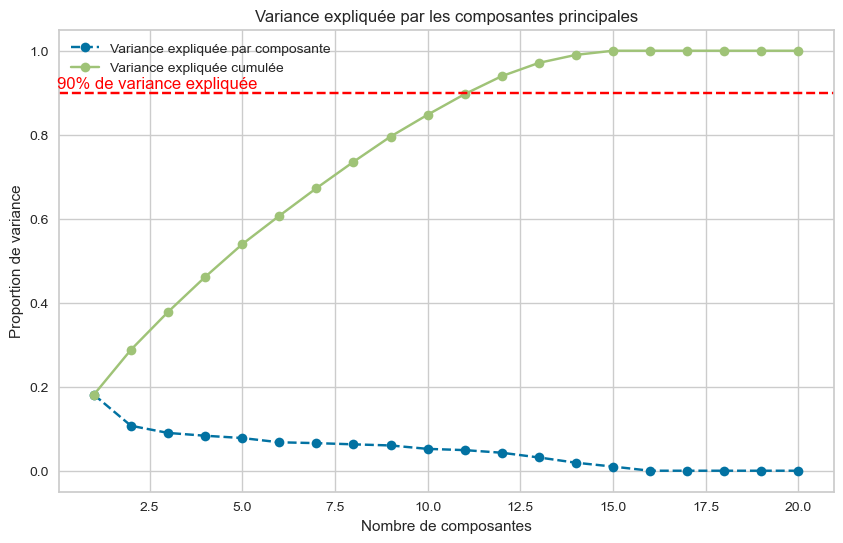

In [43]:
# Unifier le dataset
Z = pd.concat([ZQuanti, ZQuali], axis=1)
# Trouver un nombre minimal de dimensions qui captent une variance acceptable
from sklearn.decomposition import PCA
pca = PCA(svd_solver='full')
coordFact = pca.fit_transform(Z)

# Appréciation du critère du coude, et de la variance captée et cumulée, enfonction du nombre de dimensions retenues:
# Calculer la variance expliquée cumulée
variance_expliquee_cumulee = np.cumsum(pca.explained_variance_ratio_)

# Préparer les abscisses pour les graphiques (nombre de composantes)
x_ticks = np.arange(1, pca.n_components_ + 1, 1)

# Tracer la variance expliquée par chaque composante
plt.figure(figsize=(10, 6))
plt.plot(x_ticks, pca.explained_variance_ratio_, marker='o', linestyle='--', label='Variance expliquée par composante')

# Tracer la variance expliquée cumulée
plt.plot(x_ticks, variance_expliquee_cumulee, marker='o', linestyle='-', label='Variance expliquée cumulée')

# Ajouter une ligne horizontale pour le seuil de variance cumulée souhaité, par exemple 90%
plt.axhline(y=0.9, color='red', linestyle='--')

plt.text(0, 0.91, '90% de variance expliquée', color='red')

# Ajouter les légendes et titres
plt.xlabel('Nombre de composantes')
plt.ylabel('Proportion de variance')
plt.title('Variance expliquée par les composantes principales')
plt.legend()

plt.show()


Les 11 premiers facteurs nous permettent de retenir plus de 90% de l'information, nous gardons désormais les coordonnées factorielles sur les 11 premiers axes.

In [44]:
# transformer en data frame les coordonnées de projection de notre dataset dans l'espace réduit choisi
dfFact = pd.DataFrame(coordFact[:,:11],columns=['F'+str(i) for i in range(1,12)])
dfFact.head()

F1        F2        F3        F4        F5        F6        F7  \
0 -2.190674  0.480941 -0.374710  2.133734 -1.241531 -0.695165 -0.895902   
1 -1.287198 -2.592790 -0.252942  1.207846 -0.175140  0.762838  0.773665   
2  3.357876  1.930904 -1.337434  1.070951 -0.170449 -0.357950 -1.131545   
3  2.357117 -1.274589  1.500190 -0.318902 -1.820021 -0.611219 -0.150601   
4 -0.242810  0.614094 -0.186346 -0.651684 -2.325374 -0.197061  0.996720   

         F8        F9       F10       F11  
0  0.640241  0.876150  0.923345 -0.687271  
1  0.264028 -0.717122 -0.396118 -1.786823  
2  1.715582 -0.238729 -0.222862  1.024233  
3  1.849716 -1.147829  0.649087 -0.243821  
4 -1.200315  0.486020  0.013124  0.206126

<Axes: xlabel='F1', ylabel='F2'>

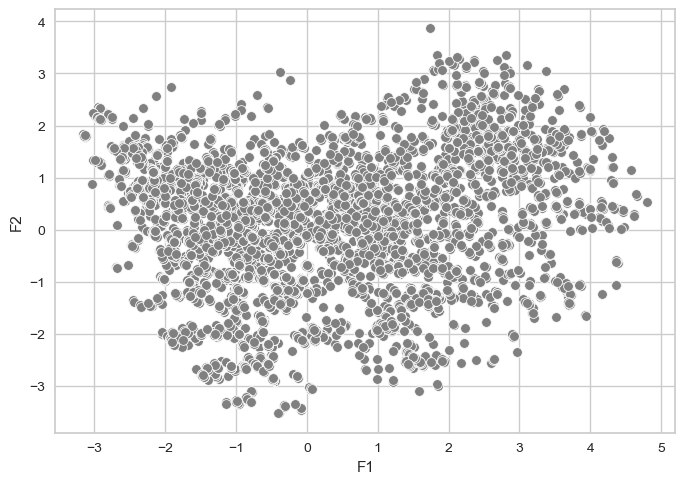

In [45]:
# Visualiser les observations dans le premier plan factoriel
# plotter les observations dans le plan factoriel
sns.scatterplot(dfFact,x='F1',y='F2',color='grey')

Il n'est pas évident ou intuitif de remarquer des clusters dans le premier plan factoriel.

In [14]:
 # Calculer le centre global
global_center = np.mean(dfFact.values, axis=0)
    
# Calculer l'inertie totale
total_inertia = np.sum((dfFact.values - global_center) ** 2)

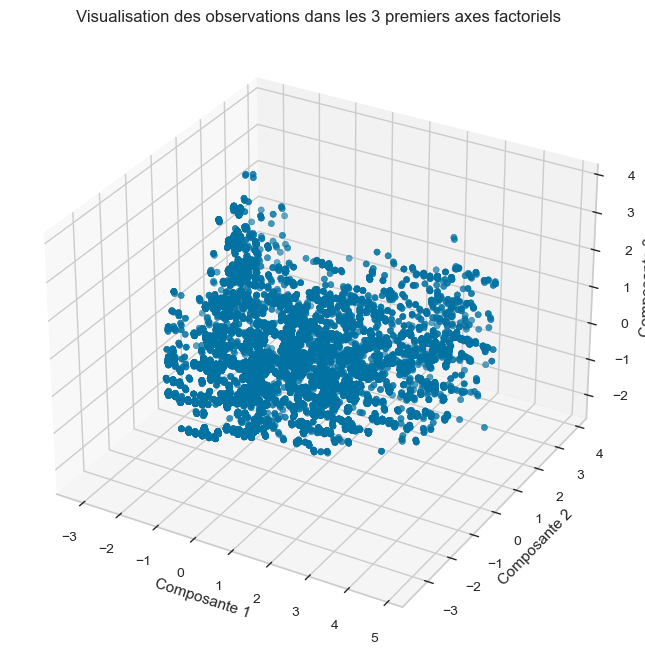

In [46]:
# Projeter les observations dans les trois premiers axes factoriels

# Création du graphique 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extraction des trois premières composantes
F1 = dfFact.iloc[:, 0]  # Première composante principale
F2 = dfFact.iloc[:, 1]  # Deuxième composante principale
F3 = dfFact.iloc[:, 2]  # Troisième composante principale

# Tracé des points
ax.scatter(F1, F2, F3)

# Étiquetage des axes
ax.set_xlabel('Composante 1')
ax.set_ylabel('Composante 2')
ax.set_zlabel('Composante 3')

# Titre
ax.set_title('Visualisation des observations dans les 3 premiers axes factoriels')

plt.show()

Il n'est pas évident non plus de remarquer des clusters sur le premier espace 3d factoriel.

## III- Modélisation sur données transformées

Nous allons dans cette partie créer un modèle et l'évaluer en nous servant de l'algorithme kmeans.


### 1- Clustering par Kmeans

Les données fournies sont celles des clients d'une entreprise, il parait raisonnable de déterminer le bon nombre de clusters à choisir dans un intervalle entre 2 et 10. 

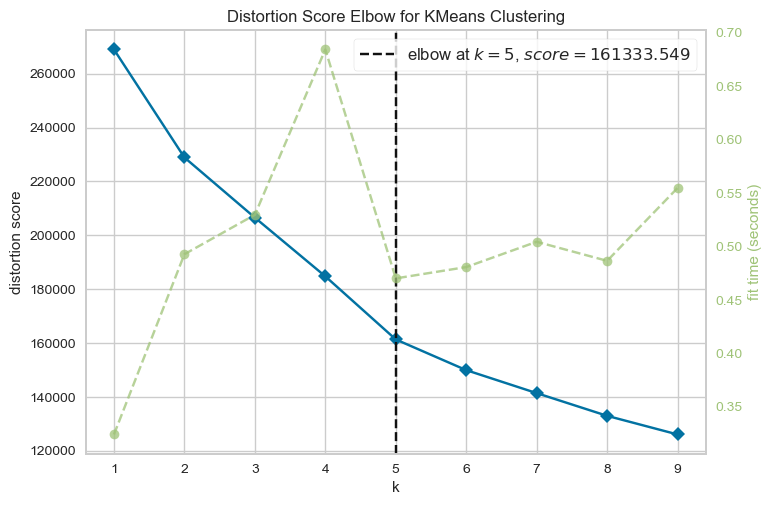

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
# Déterminer le nombre optimal de clusters à choisir, par le critère du coude
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Initialisation du modèle KMeans
model = KMeans(n_init=10, random_state=0)
# Initialisation du visualiseur KElbowVisualizer avec la métrique de distorsion (inertie)
visualizer = KElbowVisualizer(model, k=(1,10), metric='distortion', timings=True)
visualizer.fit(dfFact)
visualizer.show()

Interprétation: le critère du coude sur la métrique de l'inertie, nous oriente vers un nombre de clusters optimal de 5. Refaisons le clustering sur cette base.

In [48]:
# refaire le clustering avec le nombre de clusters optimal selon le critère du coude
km = KMeans(n_clusters=5,random_state=0)
# obtenir les groupes
groupes = km.fit_predict(dfFact)
groupes


array([2, 2, 0, ..., 1, 1, 1])

In [49]:
# Calcul des effectifs de chaque groupe
clusters, effectifs = np.unique(km.labels_,return_counts=True)
effectifs


array([5906, 4990, 2846, 3460, 2798], dtype=int64)

Les effectifs semblent plûtot équilibrés entre les 5 groupes, essayons de visualiser ces groupes dans l'espace factriel qui les a engendrés.

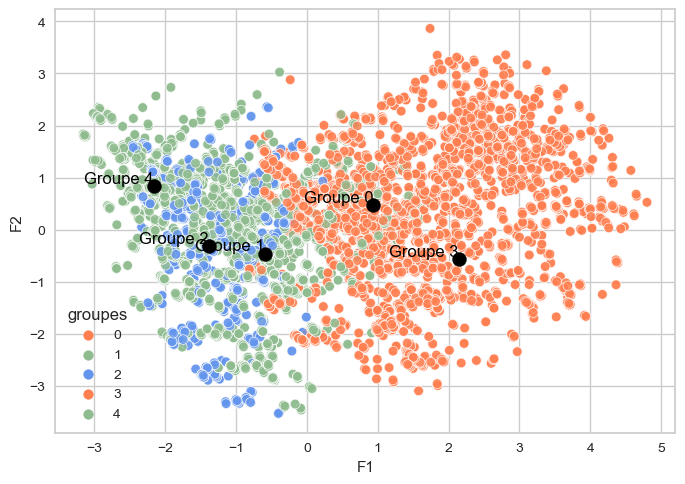

In [50]:
# Projection des observations dans le premier plan factoriel
data = dfFact.iloc[:, :2].copy()
data['groupes'] = groupes
# Assumant que 'F1' et 'F2' sont des noms de colonnes dans dfFact
graph = sns.scatterplot(data=data, x='F1', y='F2', hue='groupes', palette=['coral', 'darkseagreen', 'cornflowerblue'], alpha=0.8)

barycentres = km.cluster_centers_

# Comme barycentres est un array numpy, nous utilisons une approche différente pour l'itération
for i, centre in enumerate(barycentres):
    plt.scatter(centre[0], centre[1], color='black', s=100)  # s est la taille du marqueur
    plt.text(centre[0], centre[1], f'Groupe {i}', color='black', va='bottom', ha='right')  # Annoter chaque barycentre avec le nom du groupe

# Afficher le graphique
plt.show()

Dans ce plan une bonne séparabilité du groupe 3 qui a des valeurs positives sur le premier axe factoriel, essayons de visualiser en 3d en rajoutant le troisième axe.

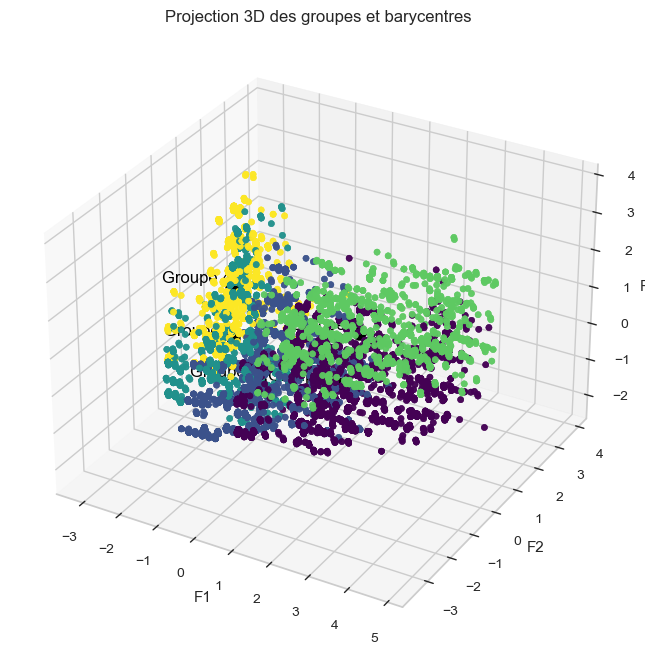

In [51]:
# Projection des observations dans les 3 premiers axes factoriels
data = dfFact[['F1', 'F2', 'F3']].copy()
data['groupes']=groupes

# Initialiser un graphique 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Tracer les points de données
scatter = ax.scatter(data['F1'], data['F2'], data['F3'], c=data['groupes'], cmap='viridis', alpha=0.8)
# Tracer les barycentres
barycentres = km.cluster_centers_
for i, centre in enumerate(barycentres):
    ax.scatter(centre[0], centre[1], centre[2], color='black', s=100)  # s est la taille du marqueur
    ax.text(centre[0], centre[1], centre[2], f'Groupe {i}', color='black', va='bottom', ha='right')  # Annoter chaque barycentre avec le nom du groupe

# Ajout de légendes et de titres si nécessaire
ax.set_xlabel('F1')
ax.set_ylabel('F2')
ax.set_zlabel('F3')
plt.title('Projection 3D des groupes et barycentres')
plt.show()

Une bonne séparabilité de ces groupes commence à être visible, continuons avec toutes les combinaisons possibles d'axes factoriels pris deux à deux.

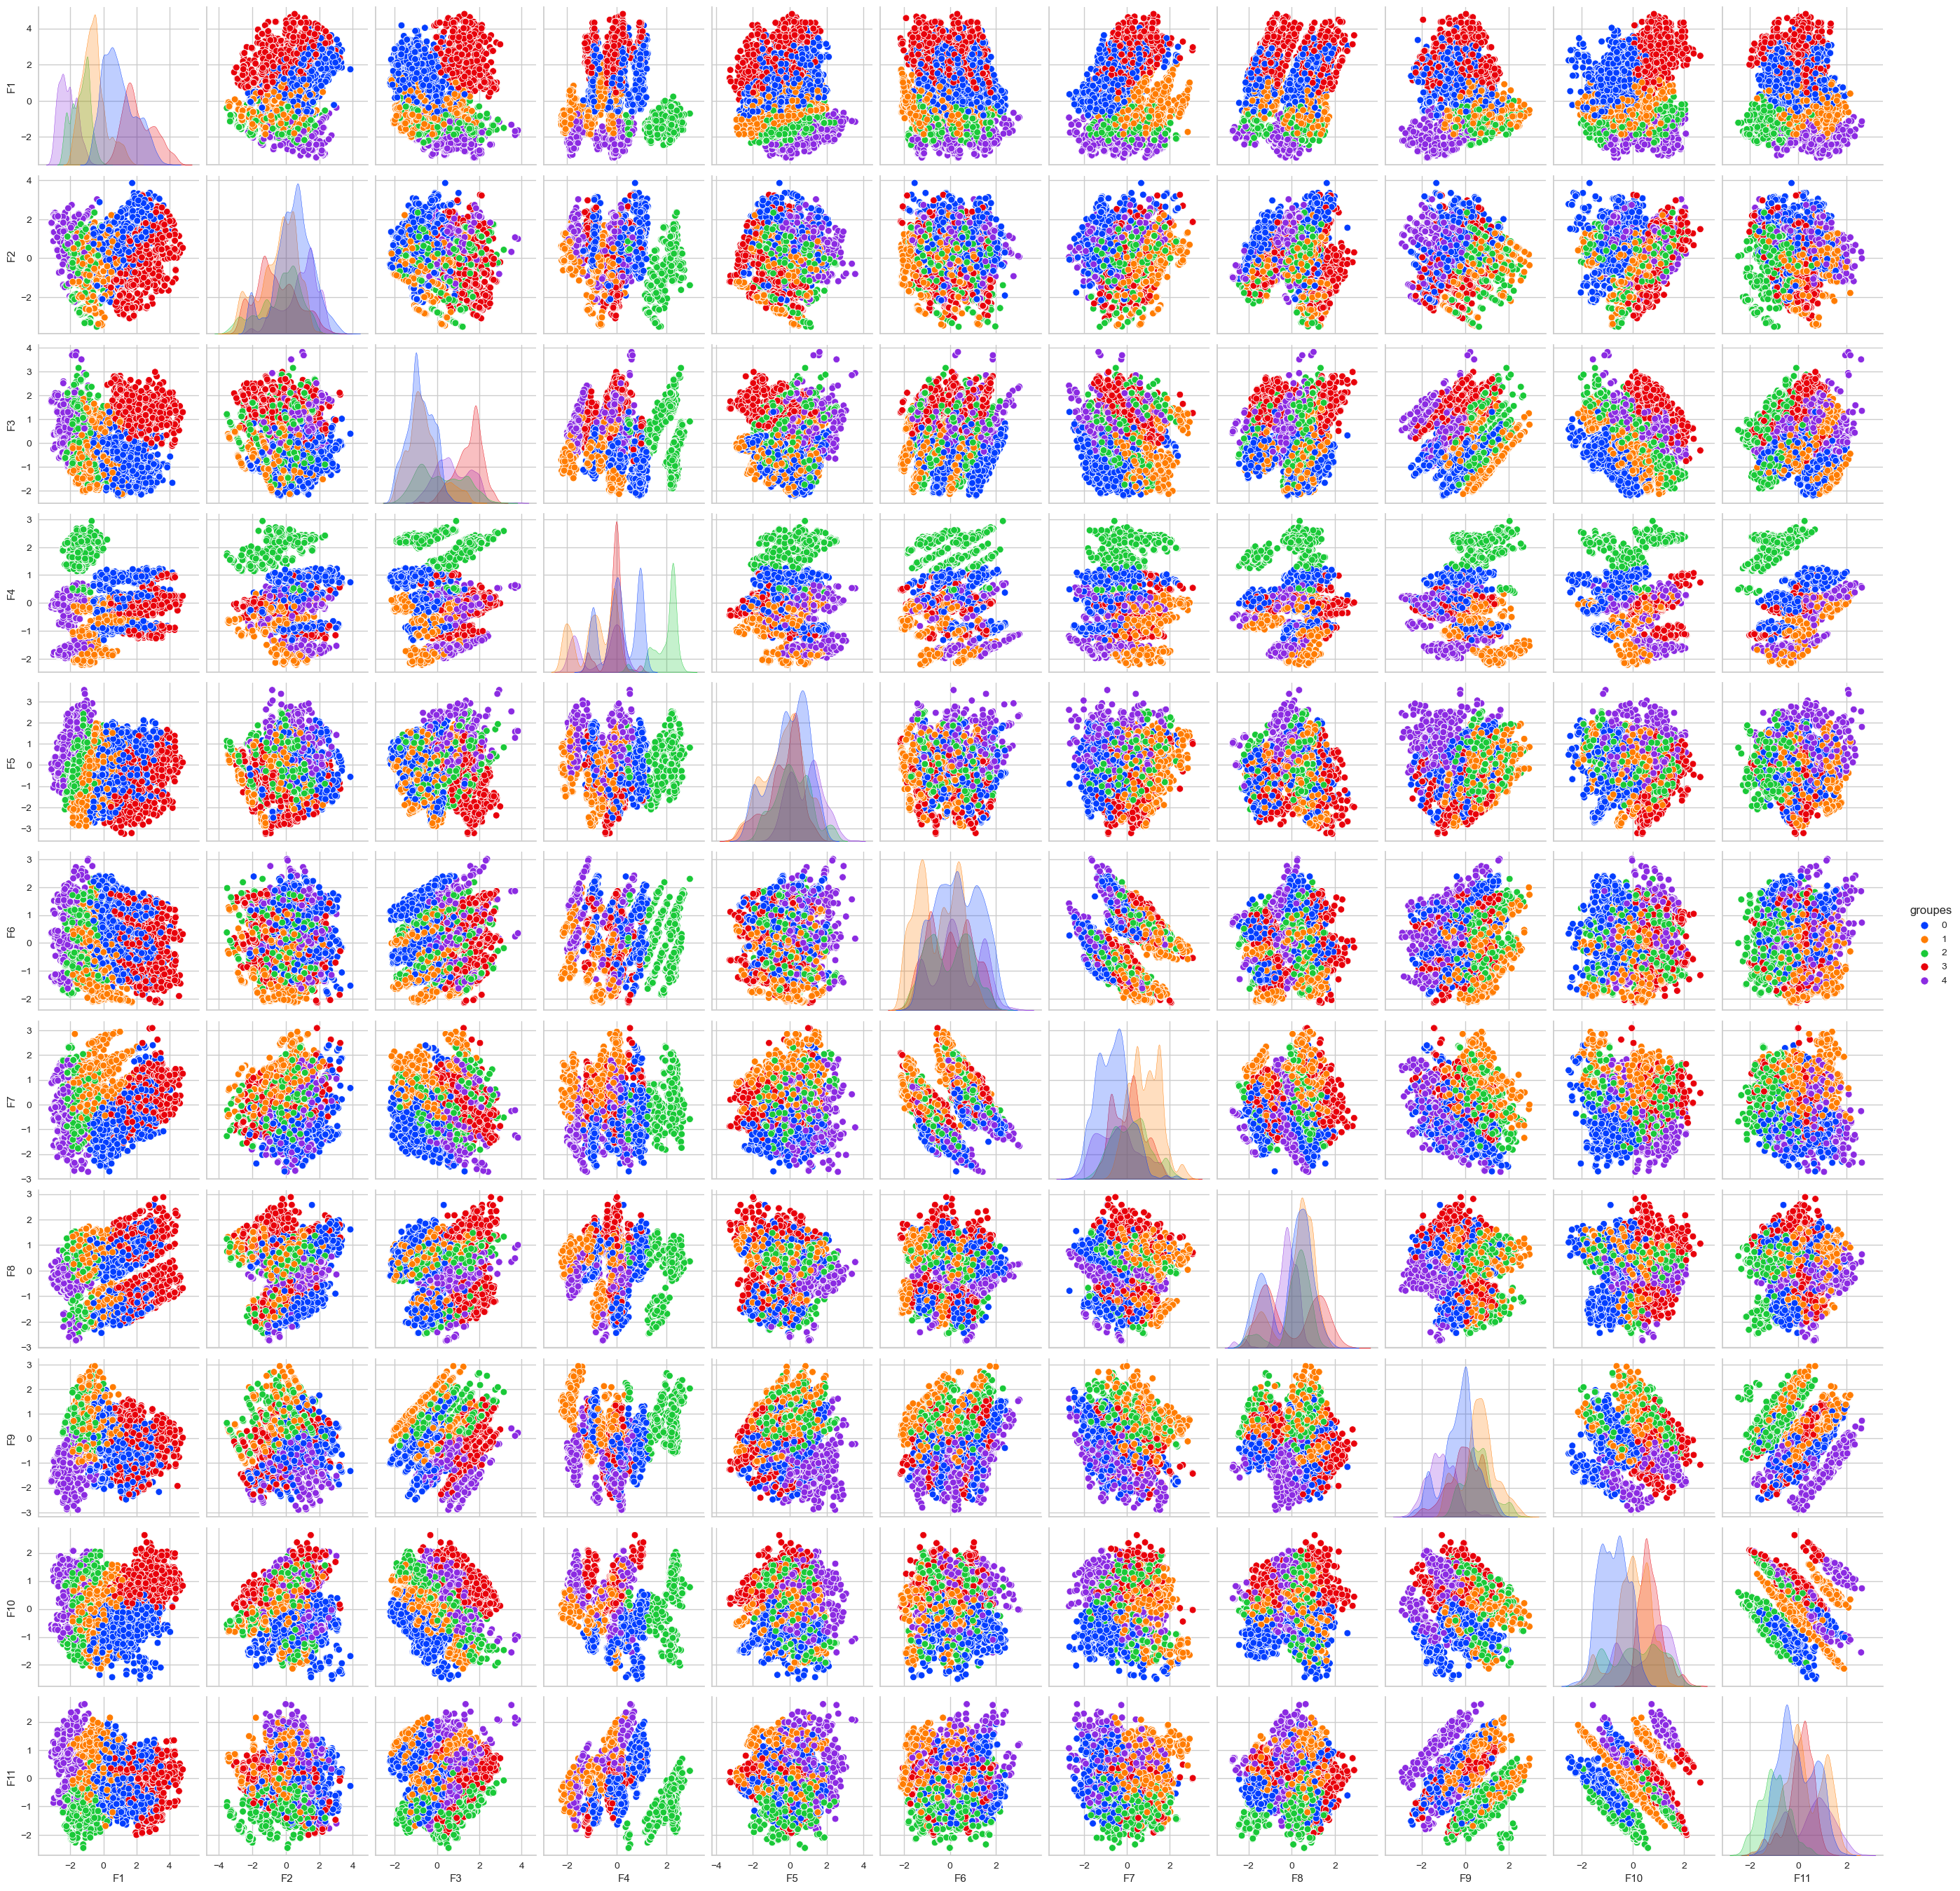

In [54]:
# Visualisation des groupes sur toutes les combinaisons de 2 axes factoriels :
data = dfFact.copy()
data['groupes']=groupes
sns.pairplot(data, hue = 'groupes', palette='bright')

La composante factorielle F4 est notable car elle permet une très bonne séparabilité d'un groupe d'une façon nette de tous les autres.

### 2- Evaluation d'inertie expliquée par le modèle
Notre modèle à 5 clusters, semble graphiquement apte à fournir une séparabilité acceptable des clients. Essayons de déterminer la part de variance que le modèle a pu capter :

In [55]:
# Calculer TSS, BSS et WSS (inertie totale, entre clusters, et intra clusters)

# petite fonction réutilisable pour calculer TSS
def calculer_TSS(data):
    # Calcul de la moyenne globale des observations
    global_mean = np.mean(data, axis=0)
    # Calcul de la somme des carrés des écarts à cette moyenne globale (TSS)
    TSS = np.sum((data - global_mean) ** 2)
    return TSS
# petite fonction réutilisable pour calculer le BSS
def calculer_BSS(data, labels):
    # Calcul de la moyenne globale des observations
    global_mean = np.mean(data, axis=0)
    
    # Initialisation de la somme des carrés inter-groupes
    BSS = 0

    # Parcourir chaque groupe pour calculer la contribution au BSS
    for group in np.unique(labels):
        # Extraction des observations du groupe
        group_data = data[labels == group]
        
        # Calcul de la moyenne du groupe
        group_mean = np.mean(group_data, axis=0)
        
        # Nombre d'observations dans le groupe
        n_group = len(group_data)
        
        # Accumulation de la somme des carrés inter-groupes
        BSS += n_group * np.sum((group_mean - global_mean) ** 2)

    return BSS

TSS = calculer_TSS(dfFact.values)
BSS = calculer_BSS(dfFact.values, groupes)

eta_2_algo = 1- (km.inertia_/TSS) # on se sert de l'inertie intraclusters fournie par la librairie
eta_2_perso = BSS/TSS # en se servant des outils personnels
print(eta_2_algo)
print(eta_2_perso)


0.4002430600914513
0.400243060091453


Nos deux approches fournissent un résultat identique, ce qui rassure sur la justesse des fonctions construites.
Le résultat est encourageant, le modèle capte 40% de la variance des données ce qui est plûtot un bon resultat sur des données de clients qui généralement n'offrent pas une séparabilité stricte entre les clients, et ou les observations en nombre sont souvent similaires à peu de chose près.

### 3- Interprétation des clusters:
Le modèle est encourageant, il est possible de l'améliorer mais le choix est fait de couvrir équitablement le reste des tâches requises par l'examen. Il s'agit désormais de caractériser les clusters trouvés par les variables ayant le plus participé à leur construction
#### Variables quantitatives
Commençons par explorer la corrélation entre les variables quantitatives et les clusters. Les clusters étant ici une variable quali nous utilisons le coefficient de corrélation de Spearman :


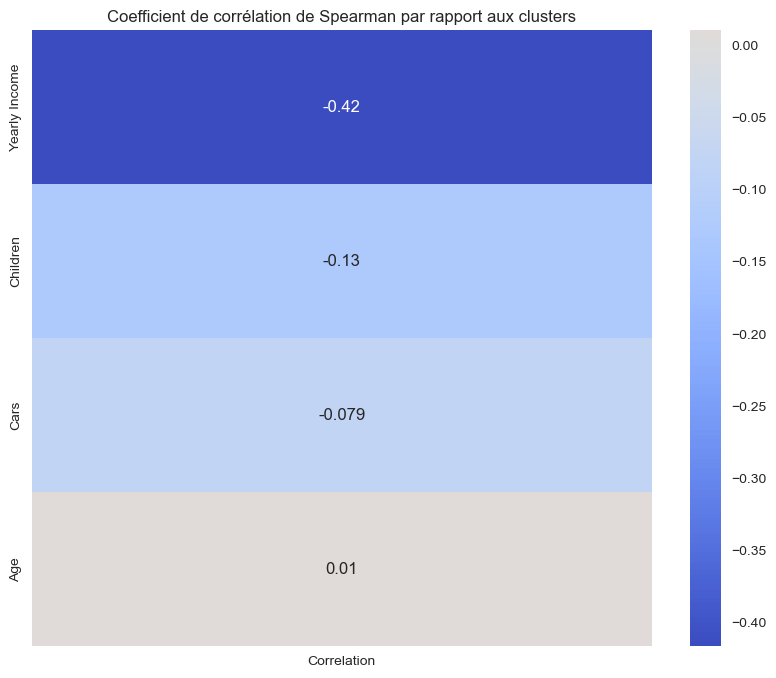

               Correlation
Yearly Income    -0.416384
Children         -0.129235
Cars             -0.079362
Age               0.010384


In [56]:
# Explorartion de la corrélation des variables quantitatives aux clusters (corr de Spearman)
from scipy.stats import spearmanr
data = DQuanti 
data['groupes']=groupes
# Calcul du coefficient de corrélation de Spearman pour chaque variable quantitative par rapport aux clusters
correlations = {}
for variable in data.columns[:-1]:
    corr, _ = spearmanr(data[variable], data['groupes'])
    correlations[variable] = corr

# Conversion du dictionnaire en DataFrame pour la visualisation
df_correlations = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])

# Visualisation sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_correlations, annot=True, cmap='coolwarm', center=0)
plt.title('Coefficient de corrélation de Spearman par rapport aux clusters')
plt.show()
print(df_correlations)

Sur les variables quantitatives, seul le revenu annuel (Yearly Income) semble significativement corrélé aux clusters. En l'occurance, le revenu annuel semble corrélé de façon négative et modérée aux clusters. Essayons maintenant d'explorer l'écart entre les moyennes conditionnelles et les moyennes marginales sur les variables quantitatives.  

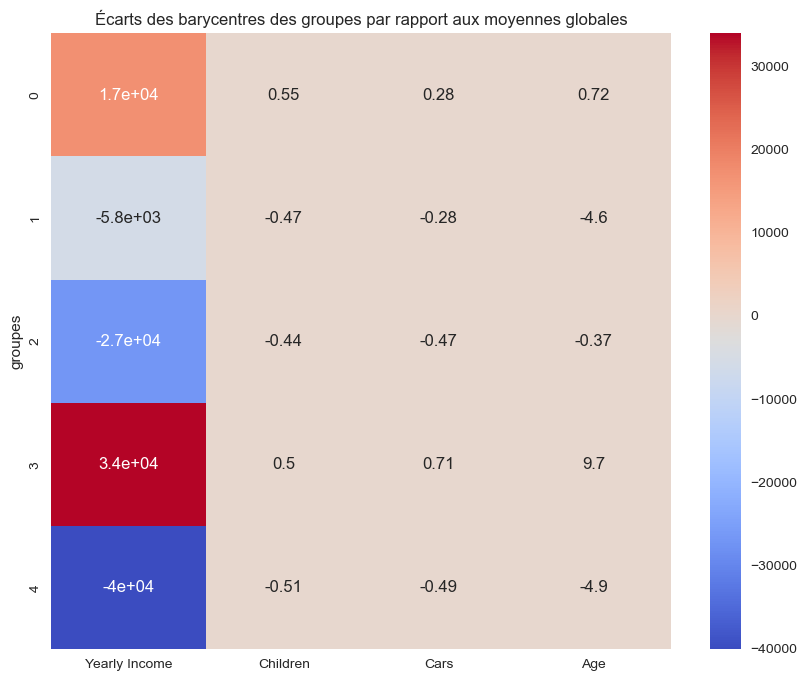

In [57]:
# Exploration de l'écart entre les barycentres des clusters et les moyennes des variables de l'échantillon étudié
data = DQuanti  # bien faire le choix entre D et Z selon facilité d'interprétation
data['groupes']=groupes
# moyennes des variables
means = data.iloc[:, :-1].mean()

# Déterminer les barycentres de chaque cluster:
# Fonction réutilisable pour calcul des barycentres
def moyennes_par_groupe(df, nom_colonne_cluster):
    # Grouper le dataframe par la colonne des clusters et calculer la moyenne de chaque groupe
    moyennes = df.groupby(nom_colonne_cluster).mean()
    
    return moyennes
# Calcul des barycentres
barycentres = moyennes_par_groupe(data, "groupes")
# Calcul des écarts des barycentres par rapport aux moyennes globales
ecarts = barycentres - means # means = 0 si data centrée
plt.figure(figsize=(10, 8))
sns.heatmap(ecarts, cmap='coolwarm', annot=True)
plt.title("Écarts des barycentres des groupes par rapport aux moyennes globales")
plt.show()

Cet mesure vient confirmer l'impact de la variable du revenu annuel:

Revenus Annuels:
- les groupe 3 et en second lieu le groupe 0 , ont des revenus annuels importants par rapport à la moyenne ( riche ?)
- les groupes, par ordre, 4 ensuite 2 ensuite 1, ont des revenus bas par rapport à la moyenne de l'échantillon de clients étudié ( pauvres ?)

Age:
- les groupe 3 et en second lieu le groupe 0 , ont un âge supérieur à la moyenne ( vieux ?)
- les groupes, par ordre, 4 ensuite 1 ensuite 2, ont un âge faible par rapport à la moyenne de l'échantillon de clients étudié ( jeunes ?)

Nombre d'enfants:
- les groupe 0 et en second lieu le groupe 3 , ont un nombre d'enfants important par rapport à la moyenne ( aisés ? conservateurs ?)
- les groupes, par ordre, 4 ensuite 2 ensuite 1, ont un nombre d'enfants bas par rapport à la moyenne de l'échantillon de clients étudié ( jeunes encore ? libéraux ?)

Le nombre de voitures est corrélé fortement au revenus annuels et au nombre d'enfants ( en extrapolant aussi aux constatations du quotidien.
 


#### Variables qualitatives
Utilisons d'abord le v de Cramer pour apprécier le lien entre la variable et le cluster:

In [60]:
# Exploration par le v de cramer

# fonction réutilisable pour le calcul du v de cramer
def cramer_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))


data = D.select_dtypes(include ='object')
data['groupes']= groupes
# Créer un DataFrame pour stocker les résultats du V de Cramér
df_cramer_v = pd.DataFrame(index=data.columns[:-1], columns=['V_de_Cramer'])

for variable in data.columns[:-1]:
    cramer_v_value = cramer_v(data['groupes'], data[variable])
    df_cramer_v.loc[variable, 'V_de_Cramer'] = cramer_v_value

# Affichage du DataFrame
print(df_cramer_v)

               V_de_Cramer
Marital Status    0.199827
Gender            0.010329
Education         0.306474
Occupation             1.0
Home Owner        0.152015


Le V de cramer indique une association parfaite entre l'Occupation et les clusters, et à moindre mesure l'Education. Essayons maintenant d'apprécier l'écart de proportion des modalités des variables entre les clusters et l'écxhantillon étudié

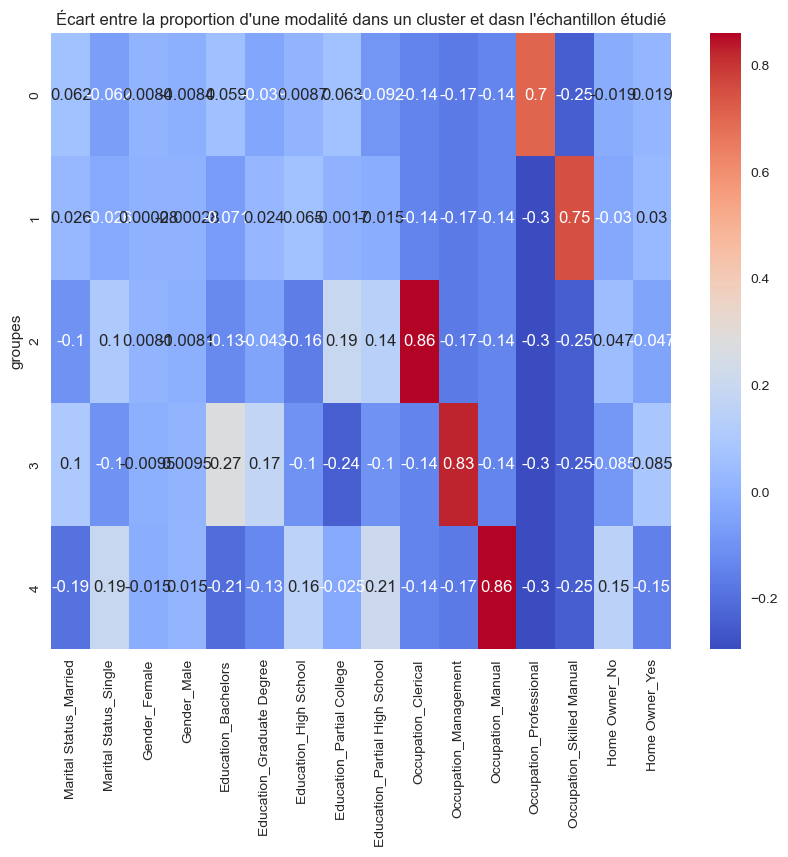

In [58]:
data = DQuali  # bien faire le choix entre D et Z selon facilité d'interprétation
data['groupes']=groupes
# proportion générale de la modalité dans l'échantillon étudié
proportion_dans_echantillon = data.iloc[:, :-1].mean()

# Calcul des proportions de chaque modalité en fonction du groupe
proportions_par_cluster = moyennes_par_groupe(data, "groupes")
# Calcul des écarts entre la proportion d une modalité dans chaque cluster et dans l'échantillon étudié
ecarts = proportions_par_cluster - proportion_dans_echantillon
plt.figure(figsize=(10, 8))
sns.heatmap(ecarts, cmap='coolwarm', annot=True)
plt.title("Écart entre la proportion d'une modalité dans un cluster et dasn l'échantillon étudié")
plt.show()


Pour l'occupation:
le groupe 2 a majoritairement une occupation de "Clerical"
le groupe 3 a majoritairement une occupation de "Management"
le groupe 4 a majoritairement une occupation de "Manual" ( travail manuel)
le groupe 1 a majoritairement une occupation de " skilled manuel " ( équivalent d'un ouvrier spécialisé et formé, disons ébéniste)
le groupe 0 a majoritairement une occupation de "Professional"

Pour l'éducation:
le groupe 3 a la plus haute concentration en diplomés d'au moins un bachelor, en contrast avec le groupe 4 qui en a le moins
 les disparités sont floutés ou pas très évidentes, sur les autres modalités de l'éducation, mais gardent un direction très corrélée à l'emploi occupé et aux revenus annuels


### 4- Conclusions sur les clusters obtenus: 
Groupe 0 : emploi "Proffesionnal", aisé+, âgé+, enfants ++
Groupe 1 : emploi "skilled manuel", faible revenu+, jeune+
Groupe 2 : emploi "clerical", jeune
Groupe 3 : emploi "management", diplômes universitaires ++, aisées++, âgés++, enfants +
Groupe 4 : profession "manual", faiblement diplômés, faibles revenus, jeunes ++

## IV- Enregistrement du modèle pour exploitation ultérieure


In [63]:
import pickle
# Spécifier le nom sous lequelle sera enregistré le modèle, le repertoire a été spécifié en amont
nom_fichier = 'modele_clustering_exploitable.pkl'
# Enregistrer le modèle en utilisant pickle
with open(nom_fichier, 'wb') as fichier:
    pickle.dump(km, fichier)

print(f'Modèle enregistré sous le nom : {nom_fichier} !')

Modèle enregistré sous le nom : modele_clustering_exploitable.pkl !
